MultiModalPredictor with Image, Natural Text, and Tabular Data

In [1]:
from autogluon.tabular import TabularDataset

In [2]:
data = TabularDataset("data/petfinder/data.csv")

In [3]:
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
0,2,Yumi Hamasaki,4,292,265,2,1,5,7,2,2,1,3,2,1,1,0,41326,bcc4e1b9557a8b3aaf545ea8e6e86991,0,I rescued Yumi Hamasaki at a food stall far aw...,7d7a39d71,3.0,0,images/7d7a39d71-1.jpg
1,2,Nene/ Kimie,12,285,0,2,5,6,7,2,3,2,2,2,1,1,0,41326,f0450bf0efe0fa3ff9321d0b827b1237,0,Has adopted by a friend with new pet name Kimie,0e107c82f,3.0,0,images/0e107c82f-1.jpg
2,2,Mattie,12,266,0,2,1,7,0,2,1,1,1,1,1,1,0,41401,9b52af6d48a4521fd01d4028eb5879a3,0,I rescued Mattie with a broken leg. After surg...,1a8fd6707,5.0,0,images/1a8fd6707-1.jpg
3,1,NaN,1,189,307,2,1,2,0,2,1,1,1,2,1,1,0,41401,88da1210e021a5cf43480b074778f3bc,0,She born on 30 September . I really hope the a...,bca8b44ae,3.0,0,images/bca8b44ae-1.jpg
4,2,Coco,6,276,285,2,2,4,7,2,2,1,1,2,1,1,100,41326,227d7b1bcfaffb5f9882bf57b5ee8fab,0,Calico Tame and easy going Diet RC Kitten Supp...,2def67952,1.0,0,images/2def67952-1.jpg


In [4]:
import os

In [5]:
os.getcwd()

'c:\\Users\\manor\\Downloads\\Automated Machine Learning with AutoGluon Library in Python\\01_multi_modal'

In [6]:
# Format image data for model
data_directory = "\\data\\petfinder\\"

In [7]:
def full_image_path(image_file):
    return os.getcwd()+data_directory+image_file

In [8]:
data['Images'] = data['Images'].apply(full_image_path)

In [9]:
data['Images'].head()

0    c:\Users\manor\Downloads\Automated Machine Lea...
1    c:\Users\manor\Downloads\Automated Machine Lea...
2    c:\Users\manor\Downloads\Automated Machine Lea...
3    c:\Users\manor\Downloads\Automated Machine Lea...
4    c:\Users\manor\Downloads\Automated Machine Lea...
Name: Images, dtype: object

In [10]:
data['Images'][0]

'c:\\Users\\manor\\Downloads\\Automated Machine Learning with AutoGluon Library in Python\\01_multi_modal\\data\\petfinder\\images/7d7a39d71-1.jpg'

In [11]:
from IPython.display import Image, display

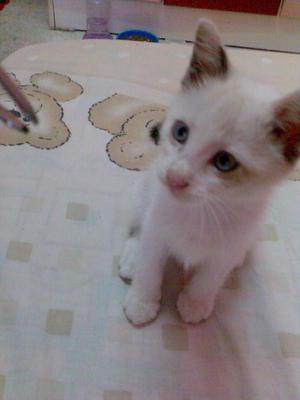

In [12]:
display(Image(data['Images'][0]))

In [13]:
len(data)

700

In [14]:
train_data = data.sample(600)
test_data = data.drop(train_data.index)

In [15]:
# train_data.head(2)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Images
686,2,Maru And Mia,12,265,265,1,1,2,5,2,2,1,2,2,1,2,0,41401,a08f2c12760a5279acc52bb74b5c3683,0,:),9ad448a42,1.0,0,c:\Users\manor\Downloads\Automated Machine Lea...
592,1,Casey,2,307,0,1,2,5,0,2,1,2,2,2,1,1,0,41326,d764c4fd47f73438f82f2e7f11c8624e,0,I've been feeding Casey's mum and his other si...,639a4bcfd,3.0,1,c:\Users\manor\Downloads\Automated Machine Lea...


In [16]:
# Predicting the AdoptionSpeed col

In [17]:
label_col = "AdoptionSpeed"

In [18]:
from autogluon.multimodal import MultiModalPredictor

In [19]:
predictor = MultiModalPredictor(label=label_col)

In [20]:
predictor.fit(train_data=train_data,
              time_limit=120,
              save_path="test_mm_model")

Global seed set to 123
AutoMM starts to create your model. ✨

- Model will be saved to "c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\01_multi_modal\test_mm_model".

- Validation metric is "roc_auc".

- To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\01_multi_modal\test_mm_model
    ```

Enjoy your coffee, and let AutoMM do the job ☕☕☕ Learn more at https://auto.gluon.ai

c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\autogluon_venv\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3191.)
  retur

Sanity Checking: 0it [00:00, ?it/s]

c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\autogluon_venv\lib\site-packages\pytorch_lightning\trainer\call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000022ABF8E9430>
Traceback (most recent call last):
  File "c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\autogluon_venv\lib\site-packages\torch\utils\data\dataloader.py", line 1466, in __del__
    self._shutdown_workers()
  File "c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\autogluon_venv\lib\site-packages\torch\utils\data\dataloader.py", line 1425, in _shutdown_workers
    self._mark_worker_as_unavailable(worker_id, shutdown=True)
  File "c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\autog

KeyError: 'val_roc_auc'

In [23]:
predictor = MultiModalPredictor.load("pet_finder")

c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\autogluon_venv\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator SimpleImputer from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\autogluon_venv\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\auto

In [ ]:
scores = predictor.evaluate(test_data, metrics=["roc_auc","acc",'f1'])
scores

Predicting: 0it [00:00, ?it/s]

{'roc_auc': 0.6196775527077305, 'acc': 0.62, 'f1': 0.703125}

Predict on a few test examples:

In [ ]:
first_five_test_features = test_data.drop(columns=label_col)[:5]
predictions = predictor.predict(first_five_test_features)
predictions

0     0
6     0
12    1
13    1
15    0
Name: AdoptionSpeed, dtype: int64

Just like before, we can also do probabilities:

In [ ]:
first_five_test_features = test_data.drop(columns=label_col)[:5]
predictions = predictor.predict_proba(first_five_test_features)
predictions

,0,1
0,0.770758,0.229242
6,0.662228,0.337772
12,0.465739,0.534261
13,0.306018,0.693982
15,0.523368,0.476632
